In [1]:
#Simple Linear Regression
# Sales Prediction
# project-02

In [2]:
# Importing required Libaries:
# supress warnings:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# Data cleaning 
# Checking null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

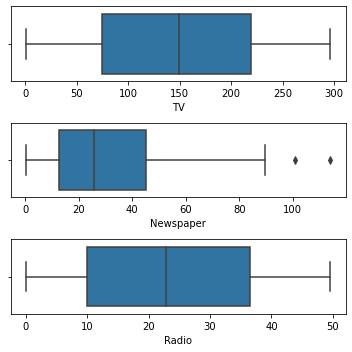

In [17]:
# Outlier Analysics:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df["TV"],ax=axs[0])
plt2=sns.boxplot(df["Newspaper"],ax=axs[1])
plt3=sns.boxplot(df["Radio"],ax=axs[2])
plt.tight_layout()

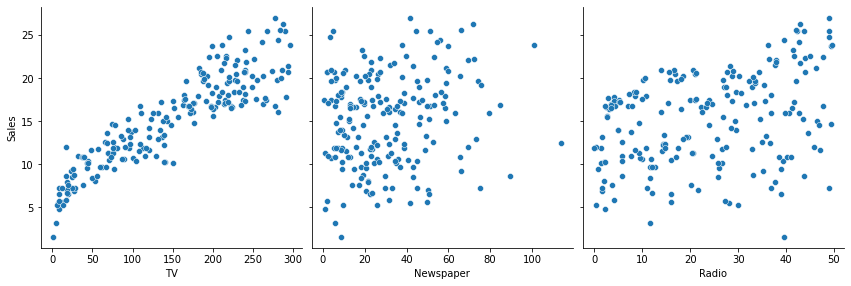

In [21]:
#EDA Exploratry Data Analysics:
# how salers are releated to other variables:
sns.pairplot(df,x_vars=["TV","Newspaper","Radio"],y_vars=["Sales"],height=4,aspect=1,kind="scatter")
plt.show()

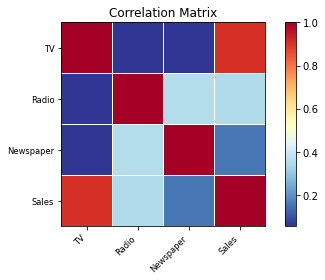

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [26]:
# Correlations between two variables:
import statsmodels.api as sm

corr=df.corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

print(corr)

In [28]:
# Building Model:
x=df["TV"]
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [30]:
y=df["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [32]:
#Train_test_split:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42,shuffle=True)

In [36]:
x_train.head()

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [38]:
y_train.head()

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
Name: Sales, dtype: float64

In [42]:
#Building a model:
X_train=sm.add_constant(x_train)

# Fit the regression line with OLS
lr=sm.OLS(y_train,X_train).fit()

In [44]:
lr.params # list the parameters for intercept and slope for the regression line

const    7.206555
TV       0.054835
dtype: float64

In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           5.08e-50
Time:                        19:09:52   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

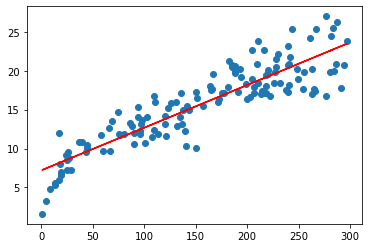

In [48]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.2066+0.0548*x_train,color="red")
plt.show()

In [51]:
#Model Evaluation
# Residual analysics..  Formulae for residuals=y-ypredict
y_train_predict=lr.predict(X_train)
res=(y_train-y_train_predict)

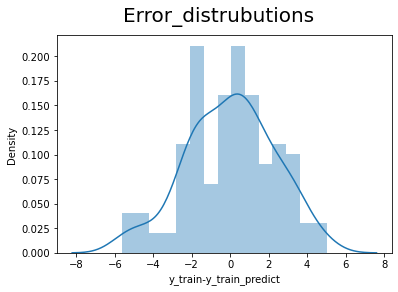

In [63]:
# Error Distrubutions:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle("Error_distrubutions",fontsize=20)
plt.xlabel("y_train-y_train_predict")
plt.show()

In [66]:
#predict the test values:
x_test=sm.add_constant(x_test)
y_test_predict=lr.predict(x_test)

In [75]:
# Find MAE,RMAE:
import sklearn.metrics as metrics
print("Train MAE:",metrics.mean_absolute_error(y_train,y_train_predict))
print("Train MSE:",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict)))

Train MAE: 1.8461456115370287
Train MSE: 2.2947606612962392


In [87]:
# r2_score:
y_predict=lr.predict(x_test)
print("R_square_value:",r2_score(y_test,y_predict))

R_square_value: 0.814855389208679
